/tmp/ipykernel_1289/825169464.py:10: DtypeWarning: Columns (7,11,13,14,24,25,26,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


total events in csv file: 1265657
total events selected: 2278


/tmp/ipykernel_1289/825169464.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_1289/825169464.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


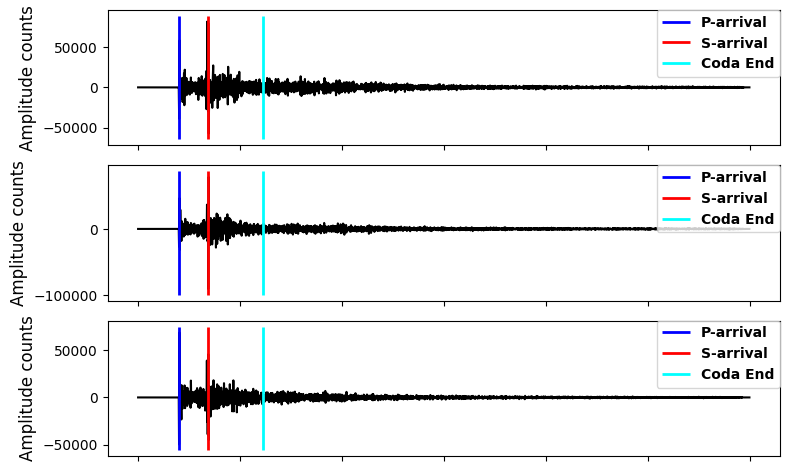

In [2]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_name = "eq/merge.hdf5"
csv_file = "eq/merge.csv"

# reading the csv file into a dataframe:
df = pd.read_csv(csv_file)
print(f'total events in csv file: {len(df)}')
# filterering the dataframe
df = df[(df.trace_category == 'earthquake_local') & (df.source_distance_km <= 20) & (df.source_magnitude > 3)]
print(f'total events selected: {len(df)}')

# making a list of trace names for the selected data
ev_list = df['trace_name'].to_list()

# retrieving selected waveforms from the hdf5 file: 
dtfl = h5py.File(file_name, 'r')
for c, evi in enumerate(ev_list):
    dataset = dtfl.get('data/'+str(evi)) 
    # waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel 
    data = np.array(dataset)

    fig = plt.figure()
    ax = fig.add_subplot(311)         
    plt.plot(data[:,0], 'k')
    plt.rcParams["figure.figsize"] = (8, 5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])

    ax = fig.add_subplot(312)         
    plt.plot(data[:,1], 'k')
    plt.rcParams["figure.figsize"] = (8, 5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])

    ax = fig.add_subplot(313)         
    plt.plot(data[:,2], 'k')
    plt.rcParams["figure.figsize"] = (8,5)
    legend_properties = {'weight':'bold'}    
    plt.tight_layout()
    ymin, ymax = ax.get_ylim()
    pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
    sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
    cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
    plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
    plt.ylabel('Amplitude counts', fontsize=12) 
    ax.set_xticklabels([])
    plt.show()   
    break   

In [6]:
np.min(data[:,0]), np.max(data[:,0])

(-57362.81, 81543.67)

In [7]:
np.min(data[:,1]), np.max(data[:,1])

(-90538.87, 78269.195)

In [9]:
import obspy